# Homework: numerical methods
PHYS300
made by: Alfaifi, Ammar
201855360

In [1]:
# import needed packages
import numpy as np

# graph settings
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
plt.rcParams['figure.figsize'] = [15, 4]
backend_inline.set_matplotlib_formats('png', 'pdf')


# Stating the funtion
Consider Fourier Series expansion of the following function
$$ F(t) = \begin{cases}
                -1, & - \pi / \omega \le t \le 0 \\
                +1, &  0 \le t \le \pi / \omega
            \end{cases} $$
take, $\omega = 1 rad/s$

# Fourier series
For a periodic function $F(t)$ with a period of $T = 2\pi / \omega$, meaning $F(t+ T) = (t)$. We can exapnd it in Fourier series as
$$ F(t)= \frac{1}{2}a_0 + \sum_{n=1}^{\infty} [a_n cos(n\omega t) + b_n sin{(n\omega t)}] $$
but since $F(t)$ is antisymetric (odd) about $O$ we can represent $F(t)$ with only sine terms ,i.e., all $a_n$'s vanish. We need to find only $b_n$
$$ b_n = \frac{2}{T} \int_0^T F(t) \sin(n\omega t)\, dt $$

# Expanding
We have the expansion as 
$$ F(t)=  \sum_{n=1}^{\infty}  b_n sin{(n\omega t)} $$
substituting $\omega =1 rad/s$, and $T = 2\pi / \omega$,
$$ F(t)=  \sum_{n=1}^{\infty}  b_n sin{(nt)} $$
and 
$$ b_n = \frac{1}{\pi} \int_{-\pi}^{\pi} F(t) \sin(n t)\, dt $$
## Doing the integral of $b_n$
We need to seprate the integral since there are two difetent functions within the integration interval, so
$$ b_n = \frac{1}{\pi} \left[ \int_{-\pi}^0 F(t) \sin(n t)\, dt + \int_0^\pi F(t) \sin(n t)\, dt \right]$$

Now substituting $F(t)$,
$$ b_n = \frac{1}{\pi} \left[ \int_{-\pi}^0 - \sin(n t)\, dt + \int_0^\pi \sin(n t)\, dt \right]$$

After integrating
$$ b_n = \frac{1}{\pi} \left[ \frac{\cos(nt)}{n} \bigg|_{-\pi}^0 +
            \frac{-\cos(nt)}{n} \bigg|_0^{-\pi} \right]$$

Calculating the limits
$$ b_n = \frac{2}{\pi n} \left[ 1 - \cos(n\pi) \right]$$



We notice that for $\cos(n\pi)$
$$ cos(n \pi) = 
    \begin{cases}
        -1, & \text{for odd } n \\
        1, & \text{for even } n \text{ and 0}
    \end{cases} $$
then we can rewrite it as $(-1)^n$, thus
$$ b_n = \frac{2}{\pi n} \left[ 1 - (-1)^n \right] $$

Thus $F(t)$ can be written as 
$$ F(t)=  \sum_{n=1}^{\infty}  \frac{2}{\pi n} \left[ 1 - (-1)^n \right] sin{(nt)} $$
Notice that for all even $n$'s, all terms are zero so,
$$ \therefore F(t)=  \frac{4}{\pi} \sum_{n=1}^{\infty}  \frac{\sin((2n-1)t)}{2n-1}  $$


# Writing the program
We define an approximation of $F(t)$ of $N$ terms as, 
$$ F(t) \approx \frac{4}{\pi} \sum_{n=1}^N  \frac{\sin((2n-1)t)}{2n-1}  $$

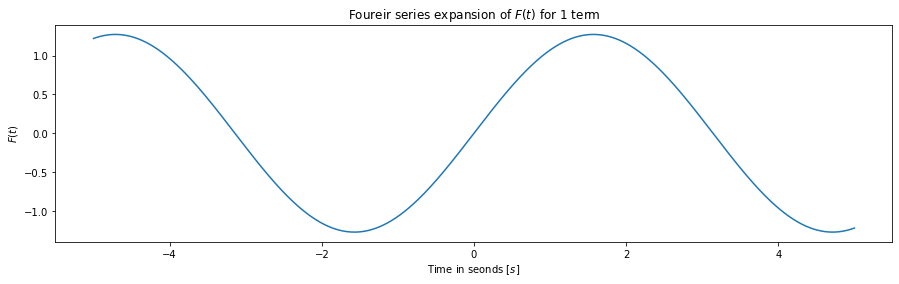

In [2]:
# Define the F(t)
def F(t, N):
    result = 0
    for n in np.arange(1, N+1):
        result += np.sin((2*n-1) * t) / (2*n-1)
    return result * 4 / np.pi

# define time spacing
epsilon = 1e-4
# Define time interval
t = np.arange(-5, 5, epsilon)
# number of terms
N = 1

plt.plot(t, F(t, N))
plt.title(f"Foureir series expansion of $F(t)$ for {N} term")
plt.xlabel('Time in seonds [$s$]')
plt.ylabel('$F(t)$')

plt.show()

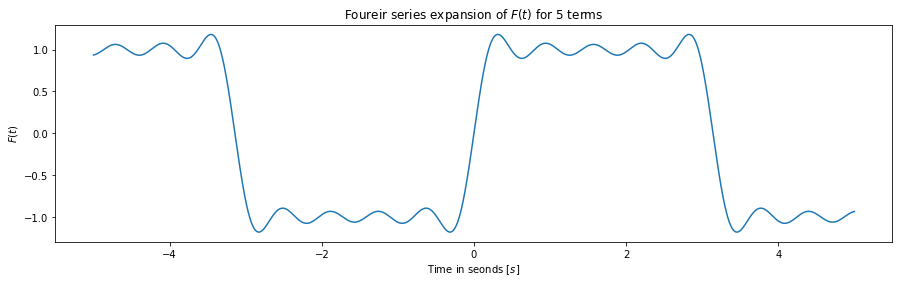

In [3]:
N = 5

plt.plot(t, F(t, N))
plt.title(f"Foureir series expansion of $F(t)$ for {N} terms")
plt.xlabel('Time in seonds [$s$]')
plt.ylabel('$F(t)$')

plt.show()

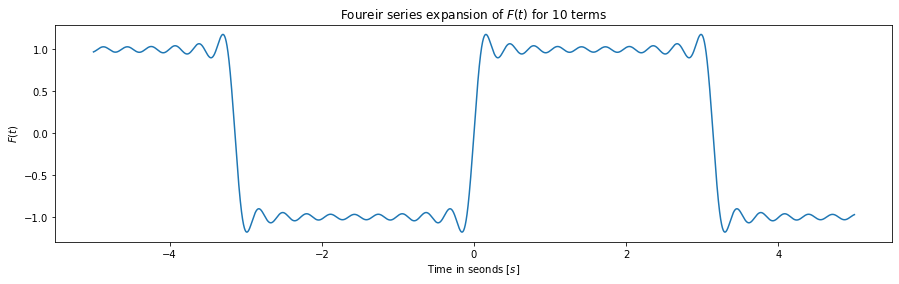

In [4]:
N = 10

plt.plot(t, F(t, N))
plt.title(f"Foureir series expansion of $F(t)$ for {N} terms")
plt.xlabel('Time in seonds [$s$]')
plt.ylabel('$F(t)$')

plt.show()

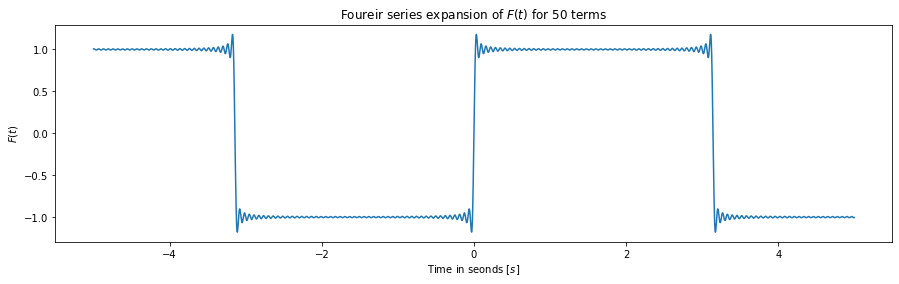

In [5]:
N = 50

plt.plot(t, F(t, N))
plt.title(f"Foureir series expansion of $F(t)$ for {N} terms")
plt.xlabel('Time in seonds [$s$]')
plt.ylabel('$F(t)$')

plt.show()

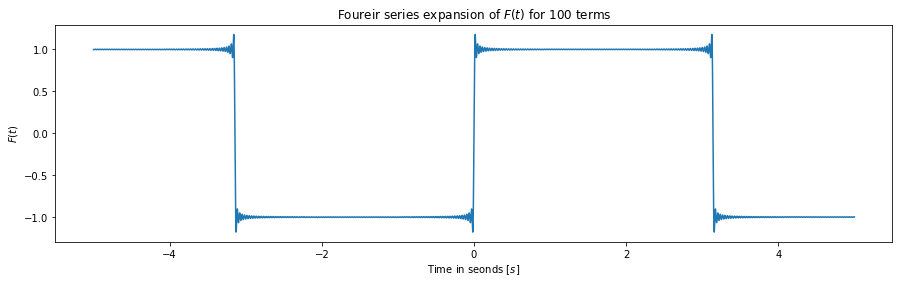

In [6]:
N = 100

plt.plot(t, F(t, N))
plt.title(f"Foureir series expansion of $F(t)$ for {N} terms")
plt.xlabel('Time in seonds [$s$]')
plt.ylabel('$F(t)$')

plt.show()

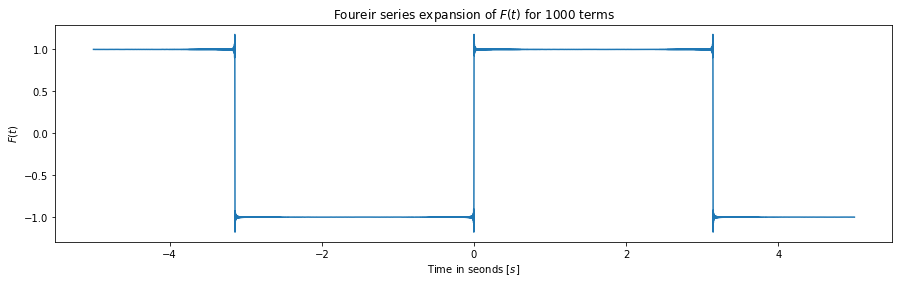

In [7]:
N = 1000

plt.plot(t, F(t, N))
plt.title(f"Foureir series expansion of $F(t)$ for {N} terms")
plt.xlabel('Time in seonds [$s$]')
plt.ylabel('$F(t)$')

plt.show()

In [8]:
print('Percentage error of 50 terms:', round(np.abs(1 - F(1, 50)) * 100, 2))
print('Percentage error of 1000 terms:', round(np.abs(1 - F(1, 1000)) * 100, 2))

Percentage error of 50 terms: 0.65
Percentage error of 1000 terms: 0.01


## About number of terms needed, $N$
We see that the as the value of $N$ the the series expainsion is getting more and more accurate to the original $F(t)$. At $N=1000$ the convergence is at its best, with error of 0.01%. However, I believe that at $N=50$, i.e., for 50 terms approximation is very stisfiygn for wide application, with error of 0.65%.For high accuaracy applicationa, about 1000 terms is very recommended.

## Weird jump
We notice at the ends of turning point of the graph, there are rabid overshots. This is called **Gibbs effect**. Furthermore, it does not seem it disappears for more and more terms.